## 1. Data

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])

In [4]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=True, download=False, transform=transforms.ToTensor()),
    batch_size = batch_size, shuffle=True)

In [5]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=False, transform=transforms.ToTensor()),
    batch_size= batch_size)

## 2. Model

In [167]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out

model = classification()
model

classification(
  (classifier1): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Sigmoid()
  )
  (classifier2): Sequential(
    (0): Linear(in_features=400, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (classifier3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

## 3. 학습

### 1) batch = 32

In [163]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=True, download=False, transform=transforms.ToTensor()),
    batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=False, transform=transforms.ToTensor()),
    batch_size=32)

In [168]:
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.005)

In [ ]:
model.train()
train_loss = []
train_accu = []

test_loss = []
test_accu = []

for epoch in range(50):
    # train data
    for data, target in train_loader:
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        prediction = output.data.max(1)[1]   
        accuracy = prediction.eq(target.data).sum() / 32 * 100
    
    # test_data
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_accuracy = correct / total * 100
            t_loss = F.nll_loss(outputs, labels)
            
    print('Train\t epoch: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(epoch, loss.data, accuracy))
    print('Test\t epoch: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(epoch, t_loss.data, test_accuracy))
    
    # save info
    train_accu.append(accuracy)
    train_loss.append(loss.data)
    test_accu.append(test_accuracy)
    test_loss.append(t_loss.data)

### 2) batch = 64

- 모델 초기화

In [203]:
model = classification()
model

classification(
  (classifier1): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Sigmoid()
  )
  (classifier2): Sequential(
    (0): Linear(in_features=400, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (classifier3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

In [204]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=True, download=False, transform=transforms.ToTensor()),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=False, transform=transforms.ToTensor()),
    batch_size=64)

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.003, momentum=0.9)

In [ ]:
model.train()
train_loss_64 = []
train_accu_64 = []

test_loss_64 = []
test_accu_64 = []

for epoch in range(50):
    # train data
    for data, target in train_loader:
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        prediction = output.data.max(1)[1]   
        accuracy = prediction.eq(target.data).sum() / 32 * 100
    
    # test_data
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_accuracy = correct / total * 100
            t_loss = F.nll_loss(outputs, labels)
            
    print('Train\t epoch: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(epoch, loss.data, accuracy))
    print('Test\t epoch: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(epoch, t_loss.data, test_accuracy))
    
    # save info
    train_accu_64.append(accuracy)
    train_loss_64.append(loss.data)
    test_accu_64.append(test_accuracy)
    test_loss_64.append(t_loss.data)

### 3) batch = 128

- 모델 초기화

In [ ]:
model = classification()
model

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=True, download=False, transform=transforms.ToTensor()),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=False, transform=transforms.ToTensor()),
    batch_size=64)

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.003, momentum=0.9)

## Output

### 1. Plot the training and testing losses with a batch size of 32 [4pt]

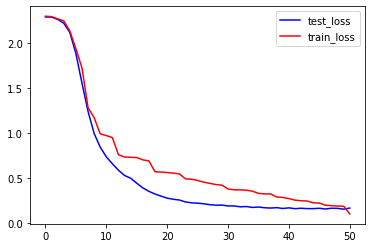

In [181]:
plt.plot([i for i in range(len(test_loss))], test_loss, c = 'blue', label = 'test_loss')
plt.plot([i for i in range(len(train_loss))], train_loss, c = 'red', label = 'train_loss')
plt.legend()
plt.show()

### 2. Plot the training and testing accuracies with a batch size of 32 [4pt]

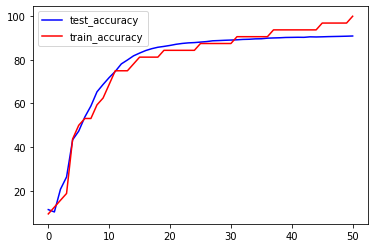

In [186]:
plt.plot([i for i in range(len(test_accu))], test_accu, c = 'blue', label = 'test_accuracy')
plt.plot([i for i in range(len(train_accu))], train_accu, c = 'red', label = 'train_accuracy')
plt.legend()
plt.show()

### 3. Plot the training and testing losses with a batch size of 64 [4pt]

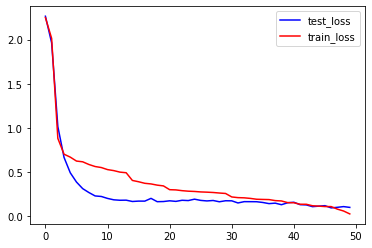

In [208]:
plt.plot([i for i in range(len(test_loss_64))], test_loss_64, c = 'blue', label = 'test_loss')
plt.plot([i for i in range(len(train_loss_64))], train_loss_64, c = 'red', label = 'train_loss')
plt.legend()
plt.show()

### 4. Plot the training and testing accuracies with a batch size of 64 [4pt]

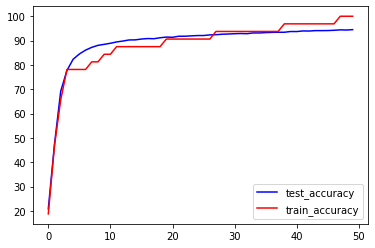

In [211]:
plt.plot([i for i in range(len(test_accu_64))], test_accu_64, c = 'blue', label = 'test_accuracy')
plt.plot([i for i in range(len(train_accu_64))], train_accu_64, c = 'red', label = 'train_accuracy')
plt.legend()
plt.show()

### 5. Plot the training and testing losses with a batch size of 128 [4pt]

### 6. Plot the training and testing accuracies with a batch size of 128 [4pt]


### 7. Print the loss at convergence with different mini-batch sizes [3pt]


In [219]:
print('batch 32\t training loss: {:.2f}\t testing loss:{:.2f}'.format(min(train_loss), min(test_loss)))
print('batch 64\t training loss: {:.2f}\t testing loss:{:.2f}'.format(min(train_loss_64), min(test_loss_64)))
print('batch 128\t training loss: {:.2f}\t testing loss:{:.2f}'.format(min(test_loss), min(train_loss)))

batch 32	 training loss: 0.06	 test loss:0.09
batch 64	 training loss: 0.03	 test loss:0.09
batch 128	 training loss: 0.09	 test loss:0.06


### 8. Print the accuracy at convergence with different mini-batch sizes [3pt]


In [221]:
print('batch 32\t training accuracy: {:.2f}\t testing accuracy:{:.2f}'.format(max(train_accu), max(test_accu)))
print('batch 64\t training accuracy: {:.2f}\t testing accuracy:{:.2f}'.format(max(train_accu_64), max(train_accu_64)))
print('batch 128\t training accuracy: {:.2f}\t testing accuracy:{:.2f}'.format(max(test_loss), max(train_loss)))

batch 32	 training accuracy: 100.00	 testing accuracy:94.26
batch 64	 training accuracy: 100.00	 testing accuracy:100.00
batch 128	 training accuracy: 2.30	 testing accuracy:2.29
